# Assignment #4 - Neural Networks

### <font color="red"> DUE: Nov 18 (Saturday) 11:00 pm </font>  

<font color="blue"> FRENY SAVALIA </font>

# I. Overview

The objective of this assignment is to study and implement Neural Network for regression dataset.

Artificial neural networks (ANN) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains. The neural network itself is not an algorithm, but rather a framework for many different machine learning algorithms to work together and process complex data inputs. Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules. For example, in image recognition, they might learn to identify images that contain cats by analyzing example images that have been manually labeled as "cat" or "no cat" and using the results to identify cats in other images. They do this without any prior knowledge about cats, for example, that they have fur, tails, whiskers and cat-like faces. Instead, they automatically generate identifying characteristics from the learning material that they process.

An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal from one artificial neuron to another. An artificial neuron that receives a signal can process it and then signal additional artificial neurons connected to it. Different layers may perform different kinds of transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.

Neural networks, or artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions, we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation. 

# II. Data


The Bike Sharing dataset is used for Regression in this assignment. As the donators of the dataset elaborate, "Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data."
The Bike Sharing dataset can help in understanding of efficient Bike Rentals. It can help identify the periods of high demands and the periods of low demands. It can also help improve the efficiency of a bike renting system.



The below code will import all the necessary packages required for data visualization and performing linear regression.

head() will display the first 5 rows of the dataset.


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn import linear_model
from sklearn.cross_validation import train_test_split


bike_data=pd.read_csv('bike.csv')
# print(bike_data)
bike_data=bike_data.head(16000)
bike_data.head()

C:\Users\Freny Savalia\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,1/1/2011,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,1/1/2011,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,1/1/2011,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,1/1/2011,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,1/1/2011,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [5]:
data_columns=['instant','dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
bike_data=pd.read_csv("bike.csv",names=data_columns)
bike_data.head(16000)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
5,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
6,6,1/1/2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,7,1/1/2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2
8,8,1/1/2011,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3
9,9,1/1/2011,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8


The columns in the above data can be interpreted as follows:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [4]:
bike_data.shape

(16176, 17)

In [5]:
bike_data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16001,16001,16001,16001,16001,16001,16001,16001,16001,16001,16001,16001,16001,16001,16001,16001,16001
unique,16001,675,5,3,13,25,3,8,3,5,51,66,90,31,320,768,868
top,7778,3/22/2011,3,0,5,16,0,6,1,1,0.62,0.6212,0.88,0,0,4,5
freq,1,24,4496,8645,1488,672,15571,2320,10956,10631,726,983,640,1980,1418,291,235


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16176 entries, 0 to 16175
Data columns (total 17 columns):
instant       16001 non-null object
dteday        16001 non-null object
season        16001 non-null object
yr            16001 non-null object
mnth          16001 non-null object
hr            16001 non-null object
holiday       16001 non-null object
weekday       16001 non-null object
workingday    16001 non-null object
weathersit    16001 non-null object
temp          16001 non-null object
atemp         16001 non-null object
hum           16001 non-null object
windspeed     16001 non-null object
casual        16001 non-null object
registered    16001 non-null object
cnt           16001 non-null object
dtypes: object(17)
memory usage: 2.1+ MB


In [7]:
def make_pivot (param1, param2):
    bike_data_slice = bike_data[[param1, param2, 'hr']]
    slice_pivot = bike_data_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart

hr                                     ...                         \
cnt       1  10 100 101 102 103 104 105 106 107 ... 963 967 968 97 970 976   
weekday                                         ...                          
0        18  22   5   2   6   5   8   9   4   7 ...   0   0   0  3   0   0   
1        29  19   3   6   5   7   6   6   5   8 ...   0   0   1  5   0   0   
2        18  21   6   8   5   6   5   3  10   4 ...   0   1   0  2   1   0   
3        29  21   1   5   4   2   4   6   7   4 ...   1   0   0  4   0   0   
4        23  12   1   5   4   3   5   5   6   3 ...   0   0   0  9   0   1   
5        19  22   2   6   8   3   5   3   7   8 ...   0   0   0  6   0   0   
6        14  23   5   7   8   7   5   3   9   2 ...   0   0   0  1   0   0   
weekday   0   0   0   0   0   0   0   0   0   0 ...   0   0   0  0   0   0   

                        
cnt     977  98 99 cnt  
weekday                 
0         0   6  5   0  
1         0   5  3   0  
2         0   8  7   0  
3         1  10  9   0  
4         0   5  7   0  
5         0   3  3   0  
6         0   3  3   0  
weekday   0   0  0   1  

[8 rows x 868 columns]

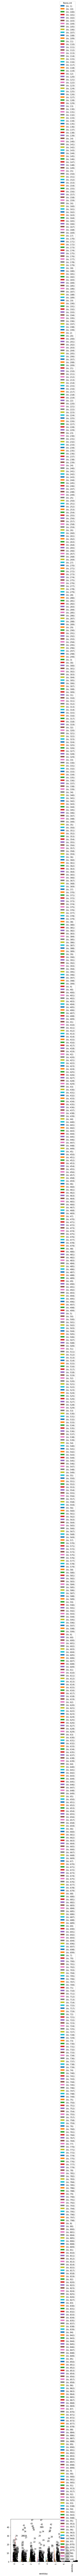

In [7]:
make_pivot ('weekday','cnt')

In [ ]:
bike_data['registered'].hist(bins=10)

In [ ]:
bike_data['casual'].hist(bins=10)

In [ ]:
bike_data.boxplot(column='cnt')

### Preprocessing of the data

At the preprocessing stage of data, we exclude all the tuples with missing values to avoid any data inconsistency.

In [ ]:
x=bike_data.iloc[:,5]
y=bike_data.iloc[:,16]
z=bike_data.iloc[:,10]

plt.plotfile('bike.csv',(5,16),linestyle="",marker="o")

Here we see the distribution of rented bike counts over 24 hours.

In [ ]:
plt.plotfile('bike.csv',(5,15),linestyle="",marker="o")

We see the distribution of registered users over the period of 24 hours in the above graph.

We will see the distribution of the casual users over the period of 24 hours in the below graph.

In [ ]:
plt.plotfile('bike.csv',(5,14),linestyle="",marker="o")

### Preliminary observation
The observations made by performing data visualization of Bike Sharing dataset are as follows:

    The count of total rental bikes is maximum at 5pm.
    There is an almost stable rate of rental bikes from 12pm to 7pm.
    There is a gradual increase in the number of casual users from 6am to 4pm.

We need to use the temperature('temp') and count('cnt') columns from the bike sharing dataset for regression. The data in the X and Y columns should be split for training and testing datasets.

In [ ]:
X = bike_data['temp'].values
Y = bike_data['cnt'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=50)

# III. Methods

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes. 
- Explain and use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

Nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations.

Previously, we learned the linear logistic regression that uses the softmax layer for classification along with a linear model. 

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
\wv_j \leftarrow \wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(\xv_n)\Big) \xv_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$


### Explanation of the below code ###

We have a Neural Network class for regression which takes the number of inputs, hidden units, and outputs as parameters.
It has the following methods:
    set_hunit    
            update/initiate weights

     pack 
            pack multiple weights of each layer into one vector

     forward
            forward processing of neural network

     backward
            back-propagation of neural network

     train
            train the neural network

     use
            appply the trained network for prediction
        
It has the following attributes:       
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target
            
            
- the add_ones function add ones to shape the data to fit the class.
- the get_nlayers function returns the number of layers
- the set_hunit function makes the value of w global for the class
- the pack and unpack function packs and unpacks the weight.
- the cp_weight functions copies the weights in a dummy variable.
- the RBF function returns the expression value of r * np.exp(-(X - m) * 2 / (2 * s * 2))
- the forward and backward function returns the errors
- the errorf function returns the the difference between the actual and the predicted value
- the train and test function are used to train and test the dataset
  

In [13]:
X_train.shape

(8000,)

In [14]:
Y_train.shape

(8000,)

In [15]:
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 


In [58]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [59]:
Y_train.shape

(12800, 1)

In [60]:
X_train.shape

(12800,)

In [64]:
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [65]:
nn = NeuralNet([1,15,1])
nn.train(X_train, Y_train,ftracep=True) 
Y_test = nn.use(X_test)

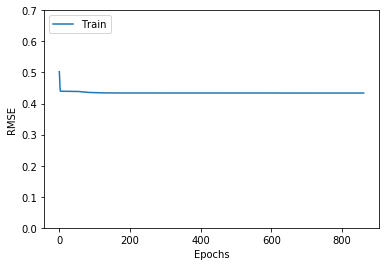

In [66]:
plt.clf()
plt.subplot(1,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

In [67]:
nn = NeuralNet([1,7,1])
nn.train(X_train, Y_train,ftracep=True) 
Y_test = nn.use(X_test)

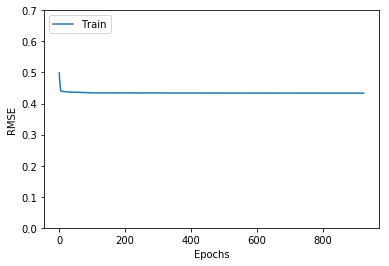

In [68]:
plt.clf()
plt.subplot(1,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

In [69]:
nn = NeuralNet([1,2,1])
nn.train(X_train, Y_train,ftracep=True) 
Y_test = nn.use(X_test)

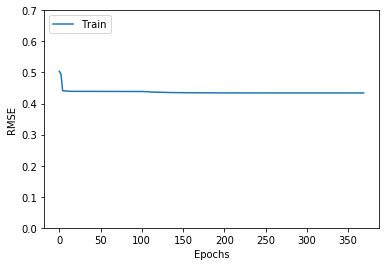

In [70]:
plt.clf()
plt.subplot(1,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

In [71]:
nn = NeuralNet([1,9,1])
nn.train(X_train, Y_train,ftracep=True) 
Y_test = nn.use(X_test)

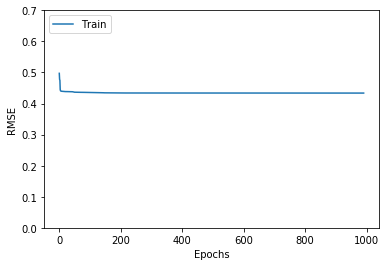

In [73]:
plt.clf()
plt.subplot(1,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

In [1]:
nn = NeuralNet([1,11,1])
nn.train(X_train, Y_train,ftracep=True) 
Y_test = nn.use(X_test)

NameError: name 'NeuralNet' is not defined

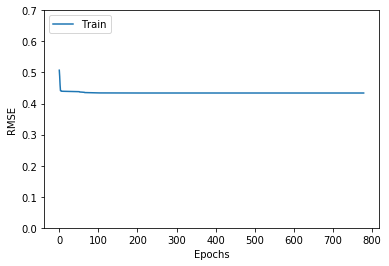

In [75]:

plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

## K-Fold Cross Validation

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

In [ ]:
i=1
for train_index, test_index in kf.split(X):
    print(train_index, test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    X_train = X_train.reshape(-1,1)
    Y_train = Y_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    nn = NeuralNet([1,11,1])
    nn.train(X_train, Y_train, ftracep=True) 
    Y_test = nn.use(X_test)
    Y_pred, Z = nn.use(X_test, retZ = True)
    plt.figure(figsize=(10,8))
    plt.subplot(3,1,1)
    plt.plot(nn.ftrace)
    plt.ylim(0,0.7)
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend(('Train','Test'),loc='upper left')
    print("The error for graph {} is {}".format(i,mean_squared_error(Y_test, Y_pred)))
    i=i+1

NameError: name 'i' is not defined

# IV - Results

- Presents the results of comparison of the tested models.
- Visualize the results 
- What do you think about the results? 

## Discussion about parameter/network choice structure

We select the parameter/network choice as [1,11,1] as because the value stabilizes in less number of epocs for a particular training and testing set. This network structure favours the dataset which is why it is selected for more on cross-validation.


## Discussion about the prediction results. Try to analyze what nonlinear regression model learned.

As we can see in the above graphs the error rate is gradually decreasing, thus proving that the non linear regression model is learning some policy and gradually the error rate is decreasing.

# Conclusions

The training and testing of a large dataset is a challenge faced in this assignment.
It is time consuming. Also, the choice of the appropriate parameters in NeuralNet() is very critical.

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Finish the following nonlinear logistic regression class and apply to your classification data. 
- Use cross validation to discover the best model. 

# Deep Learning (2 Extra Credits)


For A5 extra credits, you build a deep network with more than 5 layers using TensorFlow. 
Main task for this work is converting your neural network codes with TensorFlow and searching for good structures that works well for your data. 
This includes following tasks.

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow codes. 
- Explain how you apply your model to your data. 
- Results
  - Presents the results of applications of your deep networks.
  - Visualize the results 
  - Discuss about the choice of network structures and performance of it as you change the structures.  
  - What do you think about the results? 


In [ ]:
from __future__ import print_function

# Import MNIST data
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
import seaborn as sns
import warnings

In [ ]:
from nn import NeuralNet
class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        pass

    # Looking at the final summary or comparison table in l ecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        pass

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        pass

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        pass

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        pass


## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 |10| Summary of Neural Networks
 |10| Explanation of codes
 |25| Cross validation codes and explanation 
35 | Results | Your Data
| 10| plots for results
| 15| Discussions about parameter/network structure choice 
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
